# Clustering recipes using "Hierarchical clustering" method

In [1]:
import pandas as pd
import numpy as np
from loguru import logger
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import TruncatedSVD
import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt
import seaborn as sns

from game import clustering_utils

[nltk_data] Downloading package stopwords to C:\Users\g.decillis.SS-
[nltk_data]     GDC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#preparing data
data = pd.read_csv('../data/recipe_table.csv', sep=';')
#embedding is calculated using the recipe2vecfunction found in game/flaskapp_andrius/api/preprocesser.py 
emb = pd.read_csv('../data/embedding.csv')
data = data.merge(emb)

### Drop columns:

In [3]:
#The following columns are droppped because we will use the embedding produced by the rec2vec function.
#This function take in only "tile", "key_ingredient" and "description".
#Specials has got too many missing values so it will be dropped too. Instructions will have the same fate.
data = clustering_utils.drop_columns(df=data, columns=[
    "specials", 
    "image_url",  
    "instructions", 
    "key_ingredient",
    "title",
    "description",])

2020-09-20 10:22:38.133 | INFO     | game.clustering_utils:drop_columns:187 - Dropping columns: ['specials', 'image_url', 'instructions', 'key_ingredient', 'title', 'description']


### Fill nan values:

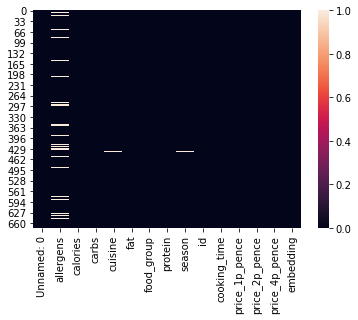

In [4]:
sns.heatmap(data.isna())

In [5]:
data = clustering_utils.fill_missing_values(df=data, column= "food_group", name='other')
data = clustering_utils.fill_missing_values(df=data, column= "cuisine", name='other')
data = clustering_utils.fill_missing_values(df=data, column="season", name='other')

2020-09-20 10:22:38.933 | INFO     | game.clustering_utils:fill_missing_values:193 - Filling nan values of column food_group with other
2020-09-20 10:22:38.941 | INFO     | game.clustering_utils:fill_missing_values:193 - Filling nan values of column cuisine with other
2020-09-20 10:22:38.941 | INFO     | game.clustering_utils:fill_missing_values:193 - Filling nan values of column season with other


### Encoding allergens

In [6]:
data = clustering_utils.count_allergens(df=data, column="allergens")

2020-09-20 10:22:39.133 | INFO     | game.clustering_utils:count_allergens:141 - Replacing allergens with count


### Label encoding: cuisine

In [7]:
data = clustering_utils.label_encoding(df=data, column="cuisine")

2020-09-20 10:22:39.261 | INFO     | game.clustering_utils:label_encoding:200 - Label encoding for column: cuisine
2020-09-20 10:22:39.269 | INFO     | game.clustering_utils:label_encoding:204 - unique classes: ['asian' 'australian' 'british' 'caribbean' 'chinese' 'european' 'french'
 'indian' 'italian' 'japanese' 'mediterranean' 'mexican' 'middle eastern'
 'north african' 'other' 'south american' 'west african']


### Hot encoding: season

In [8]:
data = clustering_utils.hot_encoding(df=data, columns=["season"])

2020-09-20 10:22:39.365 | INFO     | game.clustering_utils:hot_encoding:210 - Hot encoding for columns: ['season']


### Count encoding: food group

In [9]:
data = clustering_utils.count_encoding(df=data, column="food_group")

2020-09-20 10:22:39.477 | INFO     | game.clustering_utils:count_encoding:216 - Count encoding for column: food_group


In [10]:
data = data.set_index("id")

## Features scaling

In [11]:
X = data.copy()

In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
#PCA
n_components = 2
pca = decomposition.PCA(n_components  = n_components)
pca.fit(X)
X = pca.transform(X)

## Clustering 

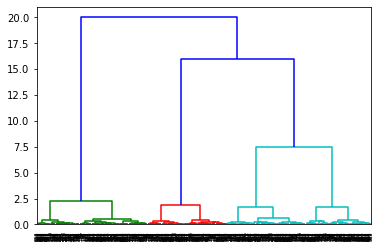

In [14]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [15]:
#according to dendogram,the number of cluster is 3
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

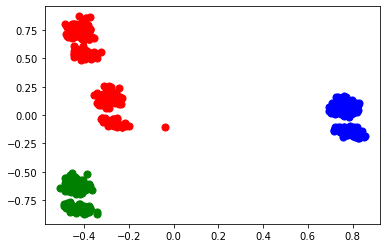

In [16]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()